# A Basic Introduction to using APIs for Acquiring Data
---

## Preliminaries

First, I will use these two libraries, so I should load them:

In [12]:
# Import two libraries
import requests # this handles the getting web data
import pandas as pd # this is pandas, where I've given a short name 'pd'

In [7]:
import sys
sys.path.append('/home/alistair/.keys')
import alistair_keys

## Open Notify (who's in Space!)

Let's use requests to get data from [the astronaut API](http://api.open-notify.org/astros.json]):

In [13]:
# Set the variable to the output of the requests.get() function
# Pointed at a very specific domain
resp = requests.get('http://api.open-notify.org/astros.json')

In [17]:
# This is an if command to check the code for the request response
if resp.status_code==200 : # the condition here is asking for a 200 status code (something like a 404 or 403 would be an error!)
    print("Good GET") # everything that's indented is then run if true
received_dict=resp.json()
# Anything run on the last line will be output to the notebook
received_dict

Good GET


{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'},
  {'craft': 'ISS', 'name': 'Nikolai Chub'},
  {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
  {'craft': 'ISS', 'name': 'Matthew Dominick'},
  {'craft': 'ISS', 'name': 'Michael Barratt'},
  {'craft': 'ISS', 'name': 'Jeanette Epps'},
  {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
  {'craft': 'ISS', 'name': 'Butch Wilmore'},
  {'craft': 'ISS', 'name': 'Sunita Williams'},
  {'craft': 'Tiangong', 'name': 'Li Guangsu'},
  {'craft': 'Tiangong', 'name': 'Li Cong'},
  {'craft': 'Tiangong', 'name': 'Ye Guangfu'}],
 'number': 12,
 'message': 'success'}

The response variable has a lot more details on the response, such as the  Server information given to it:

In [18]:
resp.headers

{'Server': 'nginx/1.10.3', 'Date': 'Thu, 13 Mar 2025 13:06:58 GMT', 'Content-Type': 'application/json', 'Content-Length': '587', 'Connection': 'keep-alive', 'access-control-allow-origin': '*'}

and the time elapsed in making the request, etc.

In [19]:
resp.elapsed

datetime.timedelta(microseconds=130188)

In [21]:
resp.status_code

200

In [22]:
type(received_dict)

dict

* Explaining the output, the braces `{ }` tell us this is a dict data type (a dictionary). 
* Each entry is an `key:value` pair a `'key'` to describe the entry, and a `value` associated with that key. 
   * So the `'message'` key has value `'success'`. 
   * The `'people'` key has a value which is a list `[ ]`
   * Each entry in the `people` list is another dictionary with two keys 
      * A `craft` for the name of the vessel
      * A `name` for the astronaut

The three keys in the dictionary are given by:

In [26]:
received_dict.items()

dict_items([('people', [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]), ('number', 12), ('message', 'success')])

In [28]:
for key,value  in received_dict.items(): 
    print(key)
    print(value)

people
[{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]
number
12
message
success


To extract the `people` entry, we just enter the key as an argument for the dictionary. 

In [29]:
spacePeople=received_dict['people']
spacePeople

[{'craft': 'ISS', 'name': 'Oleg Kononenko'},
 {'craft': 'ISS', 'name': 'Nikolai Chub'},
 {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
 {'craft': 'ISS', 'name': 'Matthew Dominick'},
 {'craft': 'ISS', 'name': 'Michael Barratt'},
 {'craft': 'ISS', 'name': 'Jeanette Epps'},
 {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
 {'craft': 'ISS', 'name': 'Butch Wilmore'},
 {'craft': 'ISS', 'name': 'Sunita Williams'},
 {'craft': 'Tiangong', 'name': 'Li Guangsu'},
 {'craft': 'Tiangong', 'name': 'Li Cong'},
 {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]

In [30]:
type(spacePeople)

list

A list is ordered group of objects,  where we can call any entry within the list using its numerical index (where the first entry is 0)

In [34]:
spacePeople[0]['craft']

'ISS'

We can get the last entry by using `-1`

In [38]:
spacePeople[-1]

{'craft': 'Tiangong', 'name': 'Ye Guangfu'}

Often in Python it's good to figure out how long things are, or what data type they are:

In [39]:
print(  len( spacePeople )  )  # len() tells me the length of the listable object
type(spacePeople[0])  # type() confirms this is a list data type

12


dict

The list here is made up of a series of 'dict' (a dictionary) entries, the key-name and value pair for the specific list entry.

Here I'm just going to extract the type for each entry in turn and print it to output:

In [40]:
for entry in spacePeople:
    print(type(entry ))

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


So each entry is a dictionary, where the keys are (repeating the `keys()` function for all entries):

In [46]:
type(resp)

requests.models.Response

In [45]:
type(spacePeople[0].keys())

dict_keys

In [48]:
[ list(entry.keys()) for entry in spacePeople ]

[['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name'],
 ['craft', 'name']]

This same kind of syntax allows us to create a list of people quickly!

In [49]:
[person['name'] for person in spacePeople]

['Oleg Kononenko',
 'Nikolai Chub',
 'Tracy Caldwell Dyson',
 'Matthew Dominick',
 'Michael Barratt',
 'Jeanette Epps',
 'Alexander Grebenkin',
 'Butch Wilmore',
 'Sunita Williams',
 'Li Guangsu',
 'Li Cong',
 'Ye Guangfu']

Thankfully, it's easy to bring Lists of dictionaries like this into Pandas as a dataframe

In [50]:
df=pd.DataFrame(resp.json()['people'])
df

,craft,name
0,ISS,Oleg Kononenko
1,ISS,Nikolai Chub
2,ISS,Tracy Caldwell Dyson
3,ISS,Matthew Dominick
4,ISS,Michael Barratt
5,ISS,Jeanette Epps
6,ISS,Alexander Grebenkin
7,ISS,Butch Wilmore
8,ISS,Sunita Williams
9,Tiangong,Li Guangsu


Dataframes in python are similar to R, where each column can be a different data type. 

Thankfully, pandas has lots of helper functions built in that can operate on both columns

In [51]:
[spacecraft for spacecraft in df['craft'].unique()] #( for each unique entry in the column)

['ISS', 'Tiangong']

Because you may want to get data via Python, but analyze it in R, it is often convenient to export the dataframe you've constructed to a csv file.

In [52]:
df.to_csv('CurrentSpacePeople.csv',columns=["craft","name"])

In [57]:
resp = requests.get('http://api.open-notify.org/iss-now.json', timeout=5)

In [58]:
resp.json()['iss_position']

{'latitude': '-25.5463', 'longitude': '24.9972'}

So a quick little visualization (courtesy of a little back and forth with ChatGPT is):

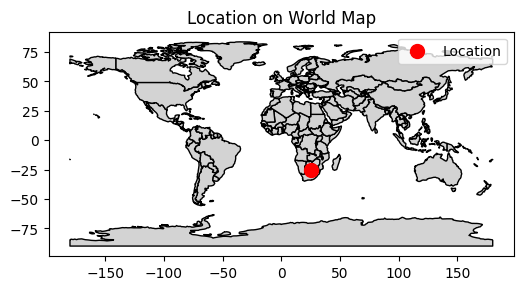

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample dictionary with longitude and latitude
location_data = resp.json()['iss_position']


world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")
fig, ax = plt.subplots(figsize=(6,6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Your location data
ax.scatter(float(location_data["longitude"]), float(location_data["latitude"]), color='red', marker='o', s=100, label="Location")

ax.set_title("Location on World Map")
ax.legend()
plt.show()

## FBI Most Wanted

Anyone who is making an API available will normally have some documentation about how to make requests. For the FBI most wanted, though fairly minimal, there is documentation [here](https://www.fbi.gov/wanted/api)

I read this, and will use it to access their data.

In [60]:
# Make an empty list
resp_list=[]
# Add the first page of result to the list 
resp_list.append( requests.get('https://api.fbi.gov/wanted/v1/list'))
# get the status code for the page (remember 200 codes are good!)
print(resp_list[0].status_code) # note that in python, lists starts at element zero!

200


In [61]:
type(resp_list[0])

requests.models.Response

In [65]:
resp_list[0].elapsed

datetime.timedelta(microseconds=213108)

The response data is stored in the `.json()` part of the requests response

In [ ]:
resp_list[0].json() # This will be quite long!

Probably easier to just iterate through the data here:

In [63]:
i=1 # initialize variable i to 1
# For each key in the dictionary, print the key name
for key in resp_list[0].json(): 
    print("key "+str(i)+": "+key)
    i=i+1
# Now that this is no longer indented, it's not part of the for loop
print (str(i-1) +" keys printed") # Summarize what we just did

key 1: total
key 2: items
key 3: page
3 keys printed


The page key here is just which page of entries the request got from the website

In [66]:
len(resp_list[0].json()['items'])

20

In [67]:
print("There are "+ str( resp_list[0].json()['total'] )+ " total entries in the MostWanted List")
print("But there are only "+str(  len(resp_list[0].json()['items']) ) + " entries in the Items list!")

There are 1045 total entries in the MostWanted List
But there are only 20 entries in the Items list!


The reason for this, is that our get request only populated the first page. From reading the documentation, we can pass a parameter to the API to ask for a different page:

In [68]:
resp_list.append(requests.get('https://api.fbi.gov/wanted/v1/list', params={'page': 2}))
print(resp_list[1].status_code)

200


Let's get multiple pages using a for loop... but before we do, let's look at one intricacy of python:

In [69]:
for ii in range(0,5): # range(0,5) would be similar
    print(ii)

0
1
2
3
4


So the range command here runs over 5 total entries, but because it starts at zero, the last entry is 4.

So we're going to need how many pages?

In [70]:
resp_list[0].json()['total']/ len( resp_list[0].json()['items'] )

52.25

Initializing our list:

In [71]:
resp_list=[]

So we'll explicitly tell it to look through pages 1 to 8

In [72]:
for ii in range(1,9): # for 1 and 8 (note it doesn't include 9) do the following: 
    resp_list.append(requests.get('https://api.fbi.gov/wanted/v1/list', params={'page': ii}))
    if resp_list[ii-1].status_code==200: print("Page "+str(ii)+" captured") # this is indented, so it's within the for loop

Page 1 captured
Page 2 captured
Page 3 captured
Page 4 captured
Page 5 captured
Page 6 captured
Page 7 captured
Page 8 captured


In [73]:
resp_list # let's check they all have 200 codes!

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

I'm going to append all the entries in the list together as a dataframe:

In [74]:
df_list=[] # create empty list
for resp in resp_list:
    df_list=df_list+resp.json()['items']
    
# No indent, so this is after the for loop...
dfJoined=pd.DataFrame(df_list) # Join all the separate dataframes in the list together, ingnoring the separate indices...
dfJoined.head()

,status,weight,occupations,details,field_offices,additional_information,modified,description,race,hair,...,dates_of_birth_used,age_min,height_min,eyes,build,files,reward_min,title,path,pathId
0,captured,160 to 180 pounds,None,None,[philadelphia],None,2025-03-12T19:42:23+00:00,"Unlawful Flight to Avoid Prosecution - Murder,...",black,black,...,"[December 1, 1997]",NaN,69.0,brown,None,[{'url': 'https://www.fbi.gov/wanted/murders/j...,0,JUSTIN SMITH,/wanted/murders/justin-smith,https://api.fbi.gov/@wanted-person/aa1f7e6d9c2...
1,na,None,None,None,[newyork],None,2025-03-11T12:52:58+00:00,Conspiracy to Commit Computer Fraud; Conspirac...,None,None,...,None,NaN,NaN,None,None,[{'url': 'https://www.fbi.gov/wanted/cyber/aqu...,0,AQUATIC PANDA CYBER THREAT ACTORS,/wanted/cyber/aquatic-panda-cyber-threat-actors,https://api.fbi.gov/@wanted-person/3a3225b6012...
2,na,None,None,None,[washingtondc],None,2025-03-11T12:43:37+00:00,"Conspiracy to Cause Damage To, and Obtain Info...",asian,black,...,"[July 9, 1979]",NaN,NaN,brown,None,[{'url': 'https://www.fbi.gov/wanted/cyber/zho...,0,ZHOU SHUAI,/wanted/cyber/zhou-shuai,https://api.fbi.gov/@wanted-person/e61eaa6e44f...
3,na,None,None,None,[washingtondc],None,2025-03-11T12:42:05+00:00,"Conspiracy to Cause Damage To, and Obtain Info...",asian,black,...,"[December 8, 1986]",NaN,NaN,brown,None,[{'url': 'https://www.fbi.gov/wanted/cyber/yin...,0,YIN KECHENG,/wanted/cyber/yin-kecheng,https://api.fbi.gov/@wanted-person/f2f0bb648e3...
4,captured,Approximately 160 pounds,"[Demolition, Asbestos removal]",None,[houston],None,2025-03-07T16:04:58+00:00,Sex-Trafficking Conspiracy; Conspiracy to Harb...,hispanic,black,...,"[August 2, 1968]",NaN,62.0,brown,None,[{'url': 'https://www.fbi.gov/wanted/human-tra...,0,ALFONSO ANGEL DIAZ-JUAREZ,/wanted/human-trafficking/alfonso-angel-diaz-j...,https://api.fbi.gov/@wanted-person/f37863b9-39...


In [75]:
dfJoined.columns

Index(['status', 'weight', 'occupations', 'details', 'field_offices',
       'additional_information', 'modified', 'description', 'race', 'hair',
       'hair_raw', 'eyes_raw', 'reward_max', 'possible_states',
       'warning_message', 'age_range', 'person_classification', 'weight_max',
       'place_of_birth', 'uid', 'possible_countries', 'sex', 'suspects',
       'subjects', 'ncic', 'complexion', 'publication',
       'poster_classification', 'url', 'nationality', 'coordinates', 'aliases',
       'scars_and_marks', 'race_raw', 'legat_names', 'height_max', 'images',
       'age_max', 'weight_min', 'locations', 'languages', 'caution',
       'reward_text', 'remarks', 'dates_of_birth_used', 'age_min',
       'height_min', 'eyes', 'build', 'files', 'reward_min', 'title', 'path',
       'pathId'],
      dtype='object')

In [76]:
list_of_lists=dfJoined["field_offices"].to_list()
field_office_list=set() # a set is an unordered list with no repeat entries...
for sublist in list_of_lists: 
    if sublist is not None: # If the sublist has some entries
        for office in sublist: # for each office in the sublist
            if office is not None: field_office_list.add(office) # if it isn't None type, add to the set
field_office_list # print the set at the end!

{'albuquerque',
 'atlanta',
 'boston',
 'buffalo',
 'charlotte',
 'chicago',
 'cincinnati',
 'cleveland',
 'columbia',
 'dallas',
 'denver',
 'detroit',
 'honolulu',
 'houston',
 'indianapolis',
 'jackson',
 'kansascity',
 'lasvegas',
 'littlerock',
 'losangeles',
 'louisville',
 'miami',
 'milwaukee',
 'minneapolis',
 'nashville',
 'newark',
 'newhaven',
 'newyork',
 'norfolk',
 'philadelphia',
 'phoenix',
 'portland',
 'richmond',
 'sacramento',
 'saltlakecity',
 'sanfrancisco',
 'seattle',
 'tampa',
 'washingtondc'}

We can be more precise here, where we could have asked the API about the pittsburgh field office specifically as a parameter:

In [77]:
response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
    'field_offices': 'pittsburgh'
})
pittsburghList=response.json()['items']
len(pittsburghList)

17

In [78]:
pghFBI=pd.DataFrame(pittsburghList)
pghFBI[ ['title','images','description'] ] 

,title,images,description
0,WANG DONG,[{'large': 'https://www.fbi.gov/wanted/cyber/w...,Conspiring to Commit Computer Fraud; Accessing...
1,GU CHUNHUI,[{'large': 'https://www.fbi.gov/wanted/cyber/g...,Conspiring to Commit Computer Fraud; Accessing...
2,HUANG ZHENYU,[{'large': 'https://www.fbi.gov/wanted/cyber/h...,Conspiring to Commit Computer Fraud; Accessing...
3,WEN XINYU,[{'large': 'https://www.fbi.gov/wanted/cyber/w...,Conspiring to Commit Computer Fraud; Accessing...
4,SUN KAILIANG,[{'large': 'https://www.fbi.gov/wanted/cyber/s...,Conspiring to Commit Computer Fraud; Accessing...
5,EVGENIY MIKHAILOVICH BOGACHEV,[{'large': 'https://www.fbi.gov/wanted/cyber/e...,Conspiracy to Participate in Racketeering Acti...
6,BARRY JAMES DEEMER,[{'large': 'https://www.fbi.gov/wanted/additio...,Unlawful Flight to Avoid Prosecution - Crimina...
7,ANATOLIY SERGEYEVICH KOVALEV,[{'large': 'https://www.fbi.gov/wanted/cyber/a...,Conspiracy to Commit an Offense Against the Un...
8,MARIA NINA MILLER,[{'large': 'https://www.fbi.gov/wanted/kidnap/...,"February 5, 2011\r\nWysox, Pennsylvania"
9,ALEXANDER LEFTEROV,[{'large': 'https://www.fbi.gov/wanted/cyber/a...,Conspiracy to Commit Computer Fraud; Intention...


There are 17 entries (so 0 to 16 in the list)

In [79]:
imgList=[]
imgLoc=pghFBI[["title","images"]]
for index, row in imgLoc.iterrows():
    imgList.append( {'name':row['title'],'thumb':row['images'][0]['thumb']})

In [80]:
imgList=[]
imgLoc=pghFBI[["title","images","description"]]
for index, row in imgLoc.iterrows(): # Here I'm iterating over each row in the dataframe
    imgList.append( {'name':row['title'],'thumb':row['images'][0]['thumb'],'alt':row['description']})
    
# Here I'll use a library called IPython to display the output in a web format:
from IPython.display import Image, display

# Now use Ipython to display them
for img in imgList[ -6: -1]: # Here I'm getting the last 5 images
    display(img['name'],Image(url=img['thumb'],width=150))

'IGOR OLEGOVICH TURASHEV'

'MAKSIM VIKTOROVICH YAKUBETS'

'BOYUSEC HACKERS'

'KATHRYN MENENDEZ'

'SARAH RAE BOEHM'

___
## Bing Search
This code requires an API key (which is like a password) to get access. I signed up for an account (and a $100 credit, student signup [here](https://azure.microsoft.com/en-us/free/students/https://azure.microsoft.com/en-us/free/students/)), and set up this access account under the *free* tier. There is documentation for the API [here](https://learn.microsoft.com/en-us/bing/search-apis/bing-web-search/quickstarts/rest/python) (in fact I copied some of their code!)

**However, they recently stopped allowing this API!**

Here I just read in my key from a file (that you don't have!)

The main results from this query are in the `"value"` key

Microsoft's help documentation also gave me the following snippet which uses IPython to display this

## Open Alex
This is a website to examine [academic papers](https://openalex.org/):


Let's make some requests to the `authors` endpoint:

In [81]:
resp = requests.get('https://api.openalex.org/authors', params={
        'filter': 'display_name.search:Alistair Wilson',
        'mailto': 'alistair@pitt.edu'
    })
data = resp.json()

In [82]:
data.keys()

dict_keys(['meta', 'results', 'group_by'])

In [83]:
data['meta']

{'count': 16,
 'db_response_time_ms': 70,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

In [86]:
data['results'][2];

Now define a function that grabs data from the API with a structured query that gets just the info we want

In [87]:
def authorSearch(nameSearch):
    query = {
        'filter': 'display_name.search:{}'.format(nameSearch),
        'mailto': 'alistair@pitt.edu'
    }
    authRequest = requests.get('https://api.openalex.org/authors', params=query)
    if authRequest.status_code == 200:
        return parseAuthor(authRequest.json())
    else:
        print(authRequest.status_code)
        return []


def orcidStrip(orcid):
    if isinstance(orcid, str):
        return orcid.strip('https://orcid.org/')
    else:
        return None


def parseAuthor(resp):
    results=resp['results']
    outDict=[{
        'name': result['display_name'],
        'openalexID': result['id'].strip('https://openalex.org/'),
        'orcidID': orcidStrip(result.get('orcid', None) ),
        'institutions': [aff.get('institution',{}).get('display_name','')+" ({:n}-{:n})".format(min(aff.get('years',[])),max(aff.get('years',[])))  for aff in result.get('affiliations',[''])],
        'citation_counts': { xx.get('year'): xx.get('cited_by_count')  for xx in result.get('counts_by_year',[{}])},
        'works_counts': { xx.get('year'): xx.get('works_count')  for xx in result.get('counts_by_year',[{}])}
    } for result in results] # for each result create a list entry
    return outDict

In [90]:
results=authorSearch("David Huffman")

In [92]:
results[0];

___
## Canvas API example

This is another API where you need an access key. Again, I've stored it locally, where tehnically, with this one, you could change anything I have access to in Canvas!

As a student in Canvas I believe you can create your own API key in the settings menu.

In [93]:
# Open the file, read the key, strip the whitespace
canvasKey=alistair_keys.canvas['key']


See [Canvas API reference](canvas.instructure.com/doc/api) for details on the set up here

In [94]:
server = "https://canvas.instructure.com/api/v1/courses"
headers = {"Authorization": "Bearer " + canvasKey}
params = {"textFormat": "HTML",'per_page': 50}
resp = requests.get(server,
                    headers=headers
                   )
if resp.status_code==200 : print("Good GET") 

Good GET


In [95]:
print( type(resp.json() ) )
print( type(resp.json()[0])  ) 

<class 'list'>
<class 'dict'>


This returns a list of entries, where the first entry in that list is a dictionary. 

Let's look at the keys in that dictionary! But to do this let's define a function to do it for us, so we can use this function repeatedly.

In [96]:
def keyPrintFunction(dictIn) : # Deine a function (everything within the function needs to be indented one level)
    # take as input a dict
    if type(dictIn) is dict: # this if line checks that it is a dict input
        typeList=[] # initialize a list
        for key in dictIn:
            # for each entry in the dictIn variable find its type
            typeList.append(type(dictIn[key]).__name__) 
            # The __name__ is just to make sure this variable is a string
        # Now outside of the loop, make a dataframe out of the typeList, where we set the index to the keys 
        dfX = pd.DataFrame( data={'dataType': typeList}, index=list(  dictIn.keys()   )   )
        return dfX # This tells the function to return the dataframe as the output
    else : # All the above was in the if loop, this else line just outputs a message 
        print("Input not a dict type")
        
# The function is ended whenever we're outside the first level of indentation
# So anything you write down here won't be part of the function


But when we run this, it gets captured by our Else...

In [97]:
keyPrintFunction(resp.json())

Input not a dict type


Because the JSON data is instead:

In [98]:
type(resp.json())

list

So let's apply out function to the first entry in our list:

In [99]:
keyPrintFunction(resp.json()[0])

,dataType
id,int
name,str
account_id,int
uuid,str
start_at,NoneType
grading_standard_id,NoneType
is_public,bool
created_at,str
course_code,str
default_view,str


In [100]:
# Let's convert the entire output into a data frame with pandas
courseList=pd.DataFrame( resp.json() )
# And now I'm asking it to display a subset of the columns in the list [ "name" , "id"]
courseList[   [ "name"  , "id"]    ] 

,name,id
0,2191_ECON_0150_SEC1010_QUANTITATIVE ANALYSIS F...,139970000000013234
1,2191_ECON_2220_SEC1030_TOPICS IN EXPERIMENTAL ...,139970000000015671
2,2194_ECON_0150_SEC1010_ECONOMIC DATA ANALYSIS,139970000000008812
3,2194_ECON_0150_SEC1020_ECONOMIC DATA ANALYSIS,139970000000008855
4,2211 ECON 2821 SEC1010 QUANTITATIVE METHODS,139970000000046646
5,2217 CMPINF 2130 SEC1100 THE ART OF DATA VISUA...,139970000000124179
6,2244 ECON 1700 SEC1000 CAPSTONE SEMINAR MICRO,139970000000241849
7,Alistair Wilson Demo Course,139970000000063599
8,Applied Econometrics,139970000000162839
9,Economics Undergraduate Hub,139970000000266247


So our course is not in that list (it's on the next page)

In [101]:
# get the course id in Canvas for our course
mqe_course_id=139970000000296418

From here I simple switch to a different part of the API, where I query the enrollments in this particular course id

In [102]:
server = "https://canvas.instructure.com/api/v1/courses/"
headersIn = {"Authorization": "Bearer " +canvasKey}
# The request string i've assembled come from looking at the API documentation at Canvas
resp = requests.get(  server+"/"+str(mqe_course_id)+"/enrollments",
                    headers=headersIn
                   )
# Return the output as a panas dataframe
studentList = pd.DataFrame(resp.json())
if resp.status_code==200 : print("Good GET") 

Good GET


In [103]:
print(  type(resp.json())  )
print(  type(resp.json()[0])  )

<class 'list'>
<class 'dict'>


So the `resp.json()[0]` variable is a dictionary, so we can apply the function we wrote above to it to get the variable types:

In [104]:
len(resp.json())

10

In [105]:
keyPrintFunction(resp.json()[0])

,dataType
id,int
user_id,int
course_id,int
type,str
created_at,str
updated_at,str
associated_user_id,NoneType
start_at,NoneType
end_at,NoneType
course_section_id,int


Looking at the objects, there's actually another dictionary embedded within the `"user"` value of this dictionary, so we load that:

In [106]:
resp.json()[2];

In [107]:
keyPrintFunction(resp.json()[0]["user"])

,dataType
id,int
name,str
created_at,str
sortable_name,str
short_name,str
sis_user_id,str
integration_id,NoneType
login_id,str


And now I just load that information!

In [108]:
# initialize the list
studentList=[]
# for each record in the enrollments json responds
for record in resp.json():
    # print the short_name field
    print(record["user"]["short_name"])
    # append the short name to the studentList
    studentList.append(record["user"]["short_name"])

Pablo Arredondo
Jose de los Rios
Behnam Fallah
Jose Gutierrez
Jacob Hunsinger
Tyler Kellar
Ian Keller
Nachu Lakshmanan
John Morris
Lap Pham


In [110]:
# import the random library
import random 
# use it to print a random student name
print(random.choice(studentList))

Tyler Kellar


In [112]:
print(random.choice(studentList))

Jose Gutierrez


## Prebuilt Libraries for using APIs
---

Often, if an API is popular, others have made libraries to engage with it and get data. Here I just searched for "Canvas API Python"

In [ ]:
# I already installed it, but Jupyter has several `magics` for doing other things
## Here i'm installing the cavas API library to this Python Kernel
%pip install canvasapi

In [113]:
# load in the library
# Import the Canvas class
from canvasapi import Canvas
import random # I need this library to Randomize later

canvasUrl='https://canvas.instructure.com'
# Initialize a new Canvas object
canvas = Canvas(canvasUrl, canvasKey)

In [114]:
type(canvas)

canvasapi.canvas.Canvas

In [116]:
alistair=canvas.get_current_user()
logins=alistair.get_user_logins()
for login in logins:
    print(login)

139970000000020610 (ALISTAIR)


In [117]:
courseList=alistair.get_courses()
pd.DataFrame([{'id': course.id,'created': course.created_at_date, 'name': course.name } for course in courseList if course.enrollments[0]['type']=='teacher'])

,id,created,name
0,139970000000013234,2019-11-06 21:58:01+00:00,2191_ECON_0150_SEC1010_QUANTITATIVE ANALYSIS F...
1,139970000000015671,2019-11-06 22:00:55+00:00,2191_ECON_2220_SEC1030_TOPICS IN EXPERIMENTAL ...
2,139970000000008812,2019-11-06 21:52:09+00:00,2194_ECON_0150_SEC1010_ECONOMIC DATA ANALYSIS
3,139970000000008855,2019-11-06 21:52:15+00:00,2194_ECON_0150_SEC1020_ECONOMIC DATA ANALYSIS
4,139970000000046646,2020-04-23 07:05:25+00:00,2211 ECON 2821 SEC1010 QUANTITATIVE METHODS
5,139970000000063599,2020-07-17 17:49:26+00:00,Alistair Wilson Demo Course
6,139970000000162839,2022-03-01 08:06:36+00:00,Applied Econometrics
7,139970000000132892,2021-10-01 09:06:14+00:00,Exp. Seminar 2022
8,139970000000046717,2020-04-23 07:05:28+00:00,Experimental
9,139970000000109528,2021-03-02 08:08:30+00:00,Experimental (2021)


In [118]:
mqeCourse=canvas.get_course(139970000000296418)

In [119]:
studentUsers = mqeCourse.get_users(enrollment_type='student')

Here I just make a list of the students, and grab their picture if one is set in Canvas:

In [120]:
studentListIn=[[student.short_name, student.get_profile()['avatar_url'], student.email] for student in studentUsers]
studentList=[]
for student in studentListIn:
        if student[1]=="https://canvas.instructure.com/images/messages/avatar-50.png":
            studentList.append([student[0],"../../img/Avatar_"+ student[2] +".svg",student[2]])
        else:
            studentList.append(student)

Now I create a function to draw k random students from the list of students in the class, where I'm going to use Python to display this!

In [121]:
from IPython.display import display_markdown
def random_student(k):
    selStudents=random.sample(studentList,k)
    strOut="| # | Student | Img | \n | --- | --- | --- |\n"
    i=1
    for student in selStudents:
        strOut=strOut+"| "+ str(i) + "| **" + student[0] + "** | <img src="+student[1]+ " width='128' height='100'>\n"
        i=i+1
    return display_markdown(strOut , raw=True)

In [124]:
random_student(5)

| # | Student | Img | 
 | --- | --- | --- |
| 1| **Nachu Lakshmanan** | <img src=https://canvas.pitt.edu/images/thumbnails/17594674/jJKn5ICBpIdKmyjH99KfUgEVNYl33dPIoVhnPC1W width='128' height='100'>
| 2| **Jose de los Rios** | <img src=../../img/Avatar_jsd67@pitt.edu.svg width='128' height='100'>
| 3| **Patrick Swain** | <img src=https://pittsburgh.instructure.com/images/thumbnails/6604868/B7d7yVy6PJU3GGNu6yz9ihFRiey5oeFAPIxy5fT5 width='128' height='100'>
| 4| **James Philip** | <img src=https://canvas.pitt.edu/images/thumbnails/17596815/pXyGRf3iAtT8NbfWUUZJaFRsweYC6SpHtqLAyUl5 width='128' height='100'>
| 5| **Tyler Kellar** | <img src=https://canvas.pitt.edu/images/thumbnails/17608892/8xofyfeTTRPANBb8qcOJfvGKdfj4ftBX7GbpfyXU width='128' height='100'>


___
## US Census

This one also requires an access token, but they'll email you one if you just ask for it!

You can do that [US Census website](https://www.census.gov/data/developers/data-sets.html), as well as see the more extensive documentation of their API.

In [127]:
# Open the file, read the authorization key, strip the whitespace
censusKey=alistair_keys.census['key']


In [128]:
server = "https://api.census.gov/data/2014/pep/natstprc"
paramsIn = {"get": "STNAME,POP","for" : "state:*", "DATE_" : 7, "key": censusKey}
resp = requests.get(server,
                    params=paramsIn
                   )
if resp.status_code==200 : print("Good GET") 
print( type(resp.json() ) )
print( type(resp.json()[0])  ) 

Good GET
<class 'list'>
<class 'list'>


In [129]:
headColumn=resp.json()[0] # the first entry here is the column heads
dfState=pd.DataFrame(resp.json()[1:])
dfState.columns=headColumn
dfState

,STNAME,POP,DATE_,state
0,Alabama,4849377,7,01
1,Alaska,736732,7,02
2,Arizona,6731484,7,04
3,Arkansas,2966369,7,05
4,California,38802500,7,06
5,Colorado,5355866,7,08
6,Connecticut,3596677,7,09
7,Delaware,935614,7,10
8,District of Columbia,658893,7,11
9,Florida,19893297,7,12


In [130]:
CensusStateDict=dfState[["state","STNAME"]].set_index("state").to_dict()["STNAME"]

In [131]:
CensusStateDict;

### 2010 Census data

In [135]:
# Get the variables JSON file for the Decennial census from 2010
vars=requests.get("https://api.census.gov/data/2010/dec/sf1/variables.json")
print(vars.json()['variables']["P012005"])
print(vars.json()['variables']["P012029"])
print(vars.json()['variables']["P012016"])
print(vars.json()['variables']["P012040"])
print(vars.json()['variables']["COUNTY"])

{'label': 'Total!!Male!!10 to 14 years', 'concept': 'SEX BY AGE', 'predicateType': 'int', 'group': 'P12', 'limit': 0}
{'label': 'Total!!Female!!10 to 14 years', 'concept': 'SEX BY AGE', 'predicateType': 'int', 'group': 'P12', 'limit': 0}
{'label': 'Total!!Male!!50 to 54 years', 'concept': 'SEX BY AGE', 'predicateType': 'int', 'group': 'P12', 'limit': 0}
{'label': 'Total!!Female!!50 to 54 years', 'concept': 'SEX BY AGE', 'predicateType': 'int', 'group': 'P12', 'limit': 0}
{'label': 'County (FIPS)', 'group': 'N/A', 'limit': 0}


In [136]:
server = "https://api.census.gov/data/2010/dec/sf1"
paramsIn = {"get": "P012005,P012029,P012016,P012040","for" : "COUNTY:*", "key": censusKey}
resp = requests.get(server,
                    params=paramsIn
                   )
if resp.status_code==200 : print("Good GET") 
print( type(resp.json() ) )
print( type(resp.json()[0])  ) 

Good GET
<class 'list'>
<class 'list'>


In [137]:
# the first entry here is the column heads but PCT012A017,PCT012A124 aren't informative
df=pd.DataFrame(resp.json()[1:])
df.columns=["male_10_to_14", "female_10_to_14","male_50_to_54", "female_50_to_54", "state","count"]
df

,male_10_to_14,female_10_to_14,male_50_to_54,female_50_to_54,state,count
0,4465,4171,4473,4517,05,131
1,677,671,502,487,05,133
2,581,522,583,623,05,135
3,385,353,486,463,05,137
4,1439,1370,1535,1592,05,139
...,...,...,...,...,...,...
3216,2857,2841,3164,3265,55,035
3217,115,103,248,206,55,037
3218,3398,3155,4006,3969,55,039
3219,298,279,339,364,55,041


In [138]:
server = "https://api.census.gov/data/2010/dec/sf1"
paramsIn = {"get": "P012005,P012029,P012016,P012040","for" : "STATE:*", "key": censusKey}
resp = requests.get(server,
                    params=paramsIn
                   )
if resp.status_code==200 : print("Good GET") 
print( type(resp.json() ) )
print( type(resp.json()[0])  ) 

Good GET
<class 'list'>
<class 'list'>


In [140]:
df=pd.DataFrame(resp.json()[1:])
df.columns=["male_10_to_14","female_10_to_14","male_50_to_54", "female_50_to_54","state"]
df

,male_10_to_14,female_10_to_14,male_50_to_54,female_50_to_54,state
0,163417,156238,168725,178760,01
1,26147,24669,29288,27012,02
2,228995,219669,202411,213113,04
3,100896,96663,99146,102576,05
4,1325915,1265015,1266543,1296009,06
5,156872,149964,161186,168143,22
6,145813,138341,156619,162836,21
7,170192,162462,184243,186820,08
8,122924,117341,138961,145364,09
9,28953,27895,31713,34285,10


In [141]:
# Add the state names using the dictionary we defined above and the map() method
df["state_name"]=df.state.map(CensusStateDict) 

In [142]:
df

,male_10_to_14,female_10_to_14,male_50_to_54,female_50_to_54,state,state_name
0,163417,156238,168725,178760,01,Alabama
1,26147,24669,29288,27012,02,Alaska
2,228995,219669,202411,213113,04,Arizona
3,100896,96663,99146,102576,05,Arkansas
4,1325915,1265015,1266543,1296009,06,California
5,156872,149964,161186,168143,22,Louisiana
6,145813,138341,156619,162836,21,Kentucky
7,170192,162462,184243,186820,08,Colorado
8,122924,117341,138961,145364,09,Connecticut
9,28953,27895,31713,34285,10,Delaware


In [143]:
# Here I change the data from strings to integers for the numeric fields
df=df.astype({'male_10_to_14': 'int32','female_10_to_14':'int32','male_50_to_54': 'int32','female_50_to_54':'int32'})

In [144]:
df["diff_young"]=df.male_10_to_14-df.female_10_to_14
df["diff_old"]=df.male_50_to_54-df.female_50_to_54

In [145]:
# Overall rate Men at 10-14
100*(df["male_10_to_14"].sum() )/(df["male_10_to_14"].sum()+df["female_10_to_14"].sum() )

np.float64(51.1661951711957)

In [146]:
# Overall rate Men at 50-54
100*(df["male_50_to_54"].sum() )/(df["male_50_to_54"].sum()+df["female_50_to_54"].sum() )

np.float64(49.001244390238575)

In [147]:
df["sex_ratio_10_to_14"]=100*df["male_10_to_14"]/(df["male_10_to_14"]+df["female_10_to_14"] )
df["sex_ratio_50_to_54"]=100*df["male_50_to_54"]/(df["male_50_to_54"]+df["female_50_to_54"] )
df["drop"]=df["sex_ratio_10_to_14"]-df["sex_ratio_50_to_54"]

In [148]:
df[ ["state_name", "sex_ratio_10_to_14" ,"sex_ratio_50_to_54", "drop"] ].sort_values(by=['drop'])

,state_name,sex_ratio_10_to_14,sex_ratio_50_to_54,drop
1,Alaska,51.454266,52.021314,-0.567048
28,Nevada,51.138541,50.420003,0.718539
50,Wyoming,51.709081,50.901258,0.807822
34,North Dakota,51.171149,50.333154,0.837994
27,Nebraska,51.086336,50.071025,1.015311
41,South Dakota,51.293551,50.271890,1.021661
49,Wisconsin,51.135460,50.055030,1.080430
23,Minnesota,51.187766,49.954070,1.233697
13,Hawaii,51.139945,49.838739,1.301206
17,Iowa,51.431032,49.982978,1.448053


### As a Package
---
Again, searching online, I quickly found a [python package](https://pypi.org/project/CensusData/) for engaging with this API, where they had several Jupyter notebooks in the `/docs`

In [ ]:
%pip install censusdata

In [ ]:
import censusdata

In [ ]:
# Download ACS 2011-2015 5-year estimates for Pittsburgh city, Pennsylvania on population size, median age, and median household income.
censusdata.download('acs5', 2015,censusdata.censusgeo([('state', '42'), ('place', '61000')]), ['B01001_001E', 'B01002_001E', 'B19013_001E'], key=censusKey)

## Packages that interact with APIs
Many large companies will offer some type of API (though it may not be open to everyone). Searching around for these types of resources can be very useful!

In [150]:
%pip install nba_api

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [151]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog, playerprofilev2, commonplayerinfo
from nba_api.stats.library.parameters import SeasonAll

In [152]:
player_list = players.get_active_players()

In [153]:
player_list[10]

{'id': 203937,
 'full_name': 'Kyle Anderson',
 'first_name': 'Kyle',
 'last_name': 'Anderson',
 'is_active': True}

In [160]:
bamAdebayo=players.find_players_by_full_name('Lebron James')[0]
bamAdebayo

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}

In [161]:
bamAdebayo['id']

2544

In [162]:
bamPlayerInfo=commonplayerinfo.CommonPlayerInfo(player_id=bamAdebayo['id']).get_normalized_dict()
pd.DataFrame(bamPlayerInfo['CommonPlayerInfo'])

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,2544,LeBron,James,LeBron James,"James, LeBron",L. James,lebron-james,1984-12-30T00:00:00,St. Vincent-St. Mary HS (OH),USA,...,lebron_james,2003,2024,N,Y,Y,2003,1,1,Y


In [163]:
bamData=playergamelog.PlayerGameLog(player_id=bamAdebayo['id'],season=SeasonAll.all).get_data_frames()[0]
bamData

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22024,2544,0022400918,"MAR 08, 2025",LAL @ BOS,L,35,11,23,0.478,...,12,14,9,0,0,1,3,22,-11,1
1,22024,2544,0022400903,"MAR 06, 2025",LAL vs. NYK,W,44,11,23,0.478,...,11,12,8,0,1,1,3,31,4,1
2,22024,2544,0022400890,"MAR 04, 2025",LAL vs. NOP,W,33,10,18,0.556,...,7,8,6,1,2,4,1,34,7,1
3,22024,2544,0022400874,"MAR 02, 2025",LAL vs. LAC,W,36,6,17,0.353,...,4,5,9,2,1,8,2,17,-5,1
4,22024,2544,0022400859,"FEB 28, 2025",LAL vs. LAC,W,37,12,21,0.571,...,12,13,3,1,0,4,0,28,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,22003,2544,0020300068,"NOV 07, 2003",CLE @ IND,L,44,8,18,0.444,...,5,5,3,0,0,7,2,23,-7,0
1546,22003,2544,0020300057,"NOV 05, 2003",CLE vs. DEN,L,41,3,11,0.273,...,9,11,7,2,3,2,1,7,-3,0
1547,22003,2544,0020300038,"NOV 01, 2003",CLE @ POR,L,39,3,12,0.250,...,4,4,6,2,0,2,3,8,-21,0
1548,22003,2544,0020300018,"OCT 30, 2003",CLE @ PHX,L,41,8,17,0.471,...,10,12,8,1,0,7,1,21,-3,0


And so now I can calculate his career average stats:

In [164]:
bamData[["PTS","REB","AST"]].mean()

PTS    27.047742
REB     7.523226
AST     7.421935
dtype: float64

___
## Open AI API

In [ ]:
import sys
sys.path.append('/home/alistair/.keys')
import alistair_keys
import os

In [ ]:
from openai import OpenAI
client =OpenAI(api_key=alistair_keys.open_ai['key'])
response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {
      "role": "user",
      "content": "Write a Python function that takes as input a file path to an image, loads the image into memory as a numpy array, then crops the rows and columns around the perimeter if they are darker than a threshold value. Use the mean value of rows and columns to decide if they should be marked for deletion."
    }
  ],
  temperature=0.7,
  max_tokens=400,
  top_p=1
)

In [ ]:
response.choices[0].message

In [ ]:
import IPython
IPython.display.Markdown(response.choices[0].message.content)